Nombre: Jimmy Avendaño

Parte 1

Enunciado 1: dado el archivo de registros de jugadas (eventos) de MemPy,
mostrar un gráfico con el porcentaje de partidas que se juegan los fines de semana (sábados y domingos).

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import collections
from wordcloud import WordCloud
from collections import Counter

In [51]:

def partidas_finde(partidas):
    '''Funcion que evalua el porcentaje de partidas de jugadas los fines de semana y retorna un grafico del resultado'''
    df_juego_dias = list(pd.to_datetime(partidas['Tiempo'], unit='ms').dt.strftime('%w'))
    cont_dias = {item: cont for item,  cont in collections.Counter(df_juego_dias).items()}
    plt.pie([cont_dias.get('6'), cont_dias.get('0')], labels=['Sabados', 'Domingos'], autopct='%1.1f%%', startangle=90)
    plt.title('Porcentaje de partidas que se juegan los fines de semana')
    return plt.gcf()

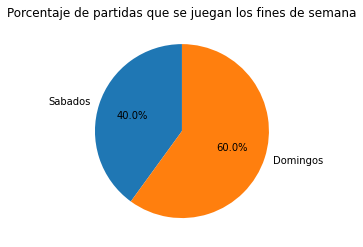

In [52]:
df_juego = pd.read_csv(os.path.join('data','plays_data.csv'))
if len(df_juego) != 0:
    partidas = df_juego[df_juego["Nombre de evento"] == "inicio_partida"]
    partidas_finde(partidas)

Parte 2

In [53]:
df_players = pd.read_csv(os.path.join('data','players_fifa21.csv'))

Criterio a utilizar: Los paises de los 25 jugadores con mayor potencial (FIFA21)

In [54]:
palabras = list(df_players.sort_values('Potential', ascending=False)[:25]['Nationality'])

In [55]:
dic = {item: cont for item,  cont in Counter(palabras).items()}

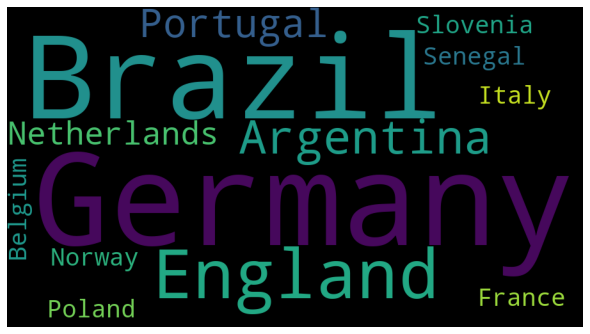

In [56]:
wordcloud = WordCloud(width=900,height=500).generate_from_frequencies(dic)
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()